In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load dataset (replace with your CSV or DataFrame)
df = pd.read_csv("Mumbai_House_Rent.csv")  # or df = your_dataframe

df=df.drop(columns = ['Balcony'])

df=df.drop_duplicates()
df

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Parking,Carpet_area(sq.ft)
0,Andheri,1 RK Apartment,20000,350 sq.ft,Semi Furnished,1,0.0,250 sq.ft
1,Andheri,3 BHK Apartment,100000,1850 sq.ft,Semi Furnished,3,2.0,1400 sq.ft
2,Andheri,2 BHK Apartment,45000,1240 sq.ft,Semi Furnished,2,1.0,850 sq.ft
3,Andheri,1 BHK Apartment,31500,650 sq.ft,Unfurnished,2,1.0,425 sq.ft
4,Andheri,2 BHK Apartment,44000,1250 sq.ft,Unfurnished,2,1.0,800 sq.ft
...,...,...,...,...,...,...,...,...
15380,Worli,3 BHK Apartment,200000,1500 sq.ft,Fully Furnished,3,0.0,1200 sq.ft
15381,Worli,1 RK Apartment,25000,300 sq.ft,Fully Furnished,1,0.0,Missing
15382,Worli,3 BHK Apartment,215000,3132 sq.ft,Semi Furnished,3,3.0,765 sq.ft
15383,Worli,2 BHK Apartment,100000,1180 sq.ft,Fully Furnished,2,1.0,920 sq.ft


In [2]:

import pandas as pd
import re


# Function to convert apartment type to number
def convert_apartment_type(Type):
    if "RK" in Type:
        return 0
    else:
        return int(re.search(r'\d+', Type).group())

# Apply function to column
df["Type"] = df["Type"].apply(convert_apartment_type)

print(df)


      Locality  Type  Rent/Month Build_up_area(sq.ft)       Furnishing  \
0      Andheri     0       20000            350 sq.ft   Semi Furnished   
1      Andheri     3      100000           1850 sq.ft   Semi Furnished   
2      Andheri     2       45000           1240 sq.ft   Semi Furnished   
3      Andheri     1       31500            650 sq.ft      Unfurnished   
4      Andheri     2       44000           1250 sq.ft      Unfurnished   
...        ...   ...         ...                  ...              ...   
15380    Worli     3      200000           1500 sq.ft  Fully Furnished   
15381    Worli     0       25000            300 sq.ft  Fully Furnished   
15382    Worli     3      215000           3132 sq.ft   Semi Furnished   
15383    Worli     2      100000           1180 sq.ft  Fully Furnished   
15384    Worli     3      240000           3400 sq.ft   Semi Furnished   

      Bathrooms  Parking Carpet_area(sq.ft)  
0             1      0.0          250 sq.ft  
1             3    

In [3]:

df = df.rename(columns={"Rent/Month": "Rent","Carpet_area(sq.ft)" : "Carpet_area"})
df


,Locality,Type,Rent,Build_up_area(sq.ft),Furnishing,Bathrooms,Parking,Carpet_area
0,Andheri,0,20000,350 sq.ft,Semi Furnished,1,0.0,250 sq.ft
1,Andheri,3,100000,1850 sq.ft,Semi Furnished,3,2.0,1400 sq.ft
2,Andheri,2,45000,1240 sq.ft,Semi Furnished,2,1.0,850 sq.ft
3,Andheri,1,31500,650 sq.ft,Unfurnished,2,1.0,425 sq.ft
4,Andheri,2,44000,1250 sq.ft,Unfurnished,2,1.0,800 sq.ft
...,...,...,...,...,...,...,...,...
15380,Worli,3,200000,1500 sq.ft,Fully Furnished,3,0.0,1200 sq.ft
15381,Worli,0,25000,300 sq.ft,Fully Furnished,1,0.0,Missing
15382,Worli,3,215000,3132 sq.ft,Semi Furnished,3,3.0,765 sq.ft
15383,Worli,2,100000,1180 sq.ft,Fully Furnished,2,1.0,920 sq.ft


In [4]:


import pandas as pd
import numpy as np

# Example column
df["Carpet_area"] = (
    df["Carpet_area"]
    .replace("Missing", np.nan)            # replace 'Missing' with NaN
    .str.replace("sq.ft", "", regex=False) # remove 'sq.ft'
    .str.strip()                           # remove extra spaces
)

# Convert to numeric (floats/integers)
df["Carpet_area"] = pd.to_numeric(df["Carpet_area"], errors="coerce")

# Drop rows where Carpet_area(sq.ft) is missing
df = df.dropna(subset=["Carpet_area"])

print(df.head())


  Locality  Type    Rent Build_up_area(sq.ft)      Furnishing Bathrooms  \
0  Andheri     0   20000            350 sq.ft  Semi Furnished         1   
1  Andheri     3  100000           1850 sq.ft  Semi Furnished         3   
2  Andheri     2   45000           1240 sq.ft  Semi Furnished         2   
3  Andheri     1   31500            650 sq.ft     Unfurnished         2   
4  Andheri     2   44000           1250 sq.ft     Unfurnished         2   

   Parking  Carpet_area  
0      0.0        250.0  
1      2.0       1400.0  
2      1.0        850.0  
3      1.0        425.0  
4      1.0        800.0  


In [5]:

import pandas as pd
import numpy as np

# Example column
df["Build_up_area(sq.ft)"] = (
    df["Build_up_area(sq.ft)"]
    .replace("Missing", np.nan)            # replace 'Missing' with NaN
    .str.replace("sq.ft", "", regex=False) # remove 'sq.ft'
    .str.strip()                           # remove extra spaces
)

# Convert to numeric (floats/integers)
df["Build_up_area(sq.ft)"] = pd.to_numeric(df["Build_up_area(sq.ft)"], errors="coerce")

# Drop rows where Carpet_area(sq.ft) is missing
df = df.dropna(subset=["Build_up_area(sq.ft)"])

print(df.head())


  Locality  Type    Rent  Build_up_area(sq.ft)      Furnishing Bathrooms  \
0  Andheri     0   20000                   350  Semi Furnished         1   
1  Andheri     3  100000                  1850  Semi Furnished         3   
2  Andheri     2   45000                  1240  Semi Furnished         2   
3  Andheri     1   31500                   650     Unfurnished         2   
4  Andheri     2   44000                  1250     Unfurnished         2   

   Parking  Carpet_area  
0      0.0        250.0  
1      2.0       1400.0  
2      1.0        850.0  
3      1.0        425.0  
4      1.0        800.0  


C:\Users\JOSHIKA\AppData\Local\Temp/ipykernel_21712/66615947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Build_up_area(sq.ft)"] = (
C:\Users\JOSHIKA\AppData\Local\Temp/ipykernel_21712/66615947.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Build_up_area(sq.ft)"] = pd.to_numeric(df["Build_up_area(sq.ft)"], errors="coerce")


In [6]:

# Drop rows where Carpet_area(sq.ft) = 'Missing'
df = df[df["Bathrooms"] != "Missing"]
df.head(30)
df.shape


(12272, 8)

In [7]:
df= df.dropna(subset=['Parking'])

In [8]:
df.isnull().sum()

Locality                0
Type                    0
Rent                    0
Build_up_area(sq.ft)    0
Furnishing              0
Bathrooms               0
Parking                 0
Carpet_area             0
dtype: int64

In [9]:

# Select features and target
X = df.drop('Rent', axis=1)
y = df['Rent']


In [10]:

# If there are categorical columns like 'Locality', 'Type', 'Furnishing', encode them
categorical_cols = ['Locality', 'Type', 'Furnishing']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

C:\Users\JOSHIKA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'plt' is not defined

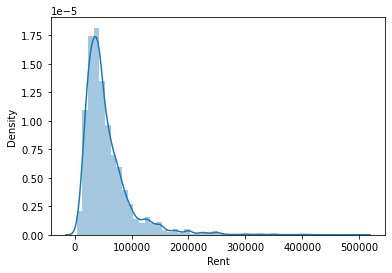

In [11]:
sns.distplot(df['Rent'])
plt.show

In [ ]:


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Optional) Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

In [ ]:


# Choose a model: Linear Regression or Random Forest
model = RandomForestRegressor(n_estimators=50, random_state=42)
# model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


In [ ]:

# Predictions
y_pred = model.predict(X_test)
print(y_pred)

In [ ]:
# Evaluate
mse=mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)
print(mse)
print(r2)